In [24]:
import matplotlib.pyplot as plt
import pybamm

## Li 電池

In [67]:
model = pybamm.lithium_ion.SPMe()
sim = pybamm.Simulation(model)

In [68]:
sim.solve([0, 3600])

In [69]:
solution = sim.solution

In [70]:
t = solution["Time [s]"]
I = solution["Current [A]"]
V = solution["Terminal voltage [V]"]

print(type(t.entries))
print(type(I.entries))
print(type(V.entries))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Reaction process')

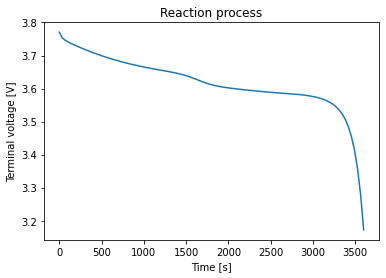

In [71]:
plt.plot(t.entries,V.entries)
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.title("Reaction process")

In [73]:
sim.save("li_battery")
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [74]:
output_variables = ["Terminal voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [75]:
model.variable_names()

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'Sum of electrolyte reaction source terms',
 'Sum of positive electrode electrolyte reaction source terms',
 'Sum of x-averaged positive electrode electrolyte reaction source terms',
 'Sum of interfacial current densities',
 'Sum of positive electrode interfacial current densities',
 'Sum of x-averaged positive electrode interfacial current densities',
 'Sum of negative electrode electrolyte reaction source terms',
 'Sum of x-averaged negative electrode electrolyte reaction source terms',
 'Sum of negative electrode interfacial current densities',
 'Sum of x-averaged negative electrode interfacial current densities',
 'r_p',
 'r_p [m]',
 'r_n',
 'r_n [m]',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Porosity',
 'Separator porosity',
 'Positive electrode porosi

## 鉛酸電池

[1] 參數參考paper: https://pybamm.readthedocs.io/en/latest/source/parameters/parameter_sets.html

[2] 參數設定方法: https://github.com/pybamm-team/PyBaMM/blob/develop/examples/notebooks/Getting%20Started/Tutorial%204%20-%20Setting%20parameter%20values.ipynb

[3] 取得模擬結果: https://github.com/pybamm-team/PyBaMM/blob/develop/examples/notebooks/Getting%20Started/Tutorial%206%20-%20Managing%20simulation%20outputs.ipynb

[4] 電池種類: https://github.com/pybamm-team/PyBaMM/tree/develop/pybamm/models/full_battery_models

In [48]:
parameter_values = pybamm.ParameterValues("Sulzer2019")

In [49]:
parameter_values

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 294.85,
 'Anion stoichiometry': 1.0,
 'Cation stoichiometry': 1.0,
 'Cation transference number': 0.7,
 'Cell cooling surface area [m2]': 0.154,
 'Cell volume [m3]': 0.00027,
 'Current function [A]': 1.0,
 'Darken thermodynamic factor': <function darken_thermodynamic_factor_Chapman1968 at 0x0000017038C65D30>,
 'Edge heat transfer coefficient [W.m-2.K-1]': 0.3,
 'Electrode height [m]': 0.114,
 'Electrode width [m]': 0.065,
 'Electrolyte conductivity [S.m-1]': <function conductivity_Gu1997 at 0x0000017038C65280>,
 'Electrolyte diffusivity [m2.s-1]': <function diffusivity_Gu1997 at 0x0000017038C65EE0>,
 'Electrolyte viscosity [kg.m-1.s-1]': <function viscosity_Chapman1968 at 0x00000170261614C0>,
 'Electrons in hydrogen reaction': 2.0,
 'Electrons in oxygen reaction': 4.0,
 'Hydrogen diffusivity [m2.s-1]': 4.5e-09,
 'Hydrogen reference OCP vs SHE [V]': 0.0,
 'Initial State of Charge': 1.0,
 'Initial oxygen concentration [mol.m-3]': 0.0,
 '

In [50]:
parameter_values["Separator thermal conductivity [W.m-1.K-1]"] = 0.05

In [62]:
parameter_values

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 294.85,
 'Anion stoichiometry': 1.0,
 'Cation stoichiometry': 1.0,
 'Cation transference number': 0.7,
 'Cell cooling surface area [m2]': 0.154,
 'Cell volume [m3]': 0.00027,
 'Current function [A]': 1.0,
 'Darken thermodynamic factor': <function darken_thermodynamic_factor_Chapman1968 at 0x0000017038C65D30>,
 'Edge heat transfer coefficient [W.m-2.K-1]': 0.3,
 'Electrode height [m]': 0.114,
 'Electrode width [m]': 0.065,
 'Electrolyte conductivity [S.m-1]': <function conductivity_Gu1997 at 0x0000017038C65280>,
 'Electrolyte diffusivity [m2.s-1]': <function diffusivity_Gu1997 at 0x0000017038C65EE0>,
 'Electrolyte viscosity [kg.m-1.s-1]': <function viscosity_Chapman1968 at 0x00000170261614C0>,
 'Electrons in hydrogen reaction': 2.0,
 'Electrons in oxygen reaction': 4.0,
 'Hydrogen diffusivity [m2.s-1]': 4.5e-09,
 'Hydrogen reference OCP vs SHE [V]': 0.0,
 'Initial State of Charge': 1.0,
 'Initial oxygen concentration [mol.m-3]': 0.0,
 '

In [52]:
model = pybamm.lead_acid.Full()
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3600])

In [53]:
model.variable_names()

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'Sum of electrolyte reaction source terms',
 'Sum of positive electrode electrolyte reaction source terms',
 'Sum of x-averaged positive electrode electrolyte reaction source terms',
 'Sum of interfacial current densities',
 'Sum of positive electrode interfacial current densities',
 'Sum of x-averaged positive electrode interfacial current densities',
 'Sum of negative electrode electrolyte reaction source terms',
 'Sum of x-averaged negative electrode electrolyte reaction source terms',
 'Sum of negative electrode interfacial current densities',
 'Sum of x-averaged negative electrode interfacial current densities',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Negative electrode interface utilisation',
 'X-averaged negative electrode interface utilisation',
 '

In [54]:
solution = sim.solution

In [55]:
t = solution["Time [s]"]
I = solution["Current [A]"]
V = solution["Terminal voltage [V]"]

print(type(t.entries))
print(type(I.entries))
print(type(V.entries))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Reaction process')

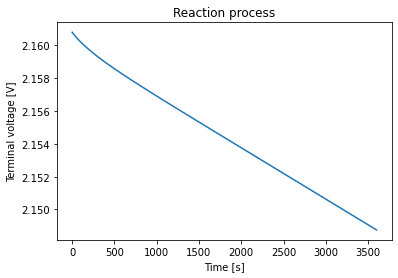

In [56]:
plt.plot(t.entries,V.entries)
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.title("Reaction process")

In [64]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…